In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter
import numpy as np

%matplotlib inline

# Every line in every episode of The Office

In [3]:
df = pd.read_csv('the-office-lines.csv')
df.head(15)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
7,8,1,1,3,Well. I don't know.,Pam,False
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False
9,10,1,1,3,What?,Pam,False


### Playing with the data a little bit

In [4]:
df.dtypes

id            int64
season        int64
episode       int64
scene         int64
line_text    object
speaker      object
deleted        bool
dtype: object

**First, let's create a df without the deleted scenes**

In [5]:
df.deleted.value_counts()

False    57973
True      1936
Name: deleted, dtype: int64

In [6]:
df_scenes = df[df['deleted'] == False]
df_scenes.shape #This is the total number of lines in the entire show 

(57973, 7)

How many lines did each character speak in the entire show?

In [7]:
df_scenes.speaker.value_counts().head()

Michael    11574
Dwight      7167
Jim         6609
Pam         5205
Andy        3968
Name: speaker, dtype: int64

In [8]:
df_scenes.speaker.value_counts().mean() # average number of lines per character 

73.38354430379746

In [9]:
df_scenes[df_scenes['season'] == 1].speaker.value_counts()

Michael               509
Jim                   231
Dwight                222
Pam                   170
Katy                   59
Oscar                  42
Jan                    38
Ryan                   37
Mr. Brown              36
Roy                    34
Kevin                  24
Stanley                24
Angela                 23
Darryl                 15
Meredith               13
Toby                   13
Phyllis                11
Everybody               6
Worker                  5
Lonny                   5
Todd Packer             3
Man on Phone            3
Madge                   3
Warehouse worker        2
Kelly                   2
Travel Agent            1
Michael and Dwight      1
Michel                  1
Teammates               1
Warehouse Worker        1
Man                     1
Name: speaker, dtype: int64

**Let's star by looking at the characters who spoke the most**

We can do two separate calculations: 
   - one for number of lines per season 
   - one for number of lines in the entire show
    
Let's normalize those number by dividing them by the total number of lines (per season or entire show).

Obs: let's consider only characters that appeared in at least 6 episodes. 

In [11]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [12]:
df_scenes["season_episode"] = df_scenes["season"].map(str) + df_scenes["episode"].map(str)
df_scenes.head(2)

c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,season,episode,scene,line_text,speaker,deleted,season_episode
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,11
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,11


In [15]:
# This is the number of episodes each character was on 

df_nep = df_scenes.groupby(['speaker']).season_episode.nunique().sort_values(ascending=False).reset_index()
df_nep

,speaker,season_episode
0,Dwight,186
1,Jim,185
2,Pam,182
3,Kevin,180
4,Angela,174
5,Stanley,170
6,Phyllis,168
7,Oscar,164
8,Andy,144
9,Kelly,142


In [27]:
more_than_6 = df_nep[df_nep.season_episode >= 6]
more_than_6

,speaker,season_episode
0,Dwight,186
1,Jim,185
2,Pam,182
3,Kevin,180
4,Angela,174
5,Stanley,170
6,Phyllis,168
7,Oscar,164
8,Andy,144
9,Kelly,142


In [28]:
list_6 = more_than_6.speaker.tolist()
list_6

['Dwight',
 'Jim',
 'Pam',
 'Kevin',
 'Angela',
 'Stanley',
 'Phyllis',
 'Oscar',
 'Andy',
 'Kelly',
 'Ryan',
 'Meredith',
 'Creed',
 'Michael',
 'Toby',
 'Darryl',
 'Erin',
 'Gabe',
 'Jan',
 'Nellie',
 'All',
 'Everyone',
 'Roy',
 'David',
 'Karen',
 'Pete',
 'Robert',
 'Clark',
 'Holly',
 'David Wallace',
 'Man',
 'Hank',
 'Guy',
 'Val',
 'Group',
 'Todd Packer',
 'Nate',
 'Woman',
 'Bob Vance',
 'Jo',
 'Both',
 'Waiter',
 'Michael and Dwight',
 'Mose',
 'Bob',
 'Charles',
 'Cathy',
 'Crowd',
 'Josh',
 'Everybody',
 'Receptionist',
 'Carol',
 'Daryl',
 'Micheal']

In [85]:
characters_more6 = df_scenes[df_scenes['speaker'].isin(list_6)]
characters_more6.head()

characters_more6 = characters_more6[characters_more6['speaker'].str.contains("All|Everyone|Man|Group|Guy|Woman|Waiter|Crowd|Receptionist|Both|Everybody|Michael and Dwight|Micheal")==False]
characters_more6.head()

,id,season,episode,scene,line_text,speaker,deleted,season_episode
0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False,11
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,11
2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False,11
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,11
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,11


In [20]:
# ANOTHER SOLUTION (A LONGER ONE)

#df_count = df_scenes.groupby(['speaker', 'season']).episode.nunique().reset_index()

#df_count2 = df_count.groupby('speaker').episode.sum().sort_values(ascending=False).reset_index()
#more_than_6 = df_count2[df_count2.episode > 6]
#more_than_6

#list_6 = more_than_6.speaker.tolist()
#list_6

#characters_more6 = df_scenes[df_scenes['speaker'].isin(list_6)]
#characters_more6

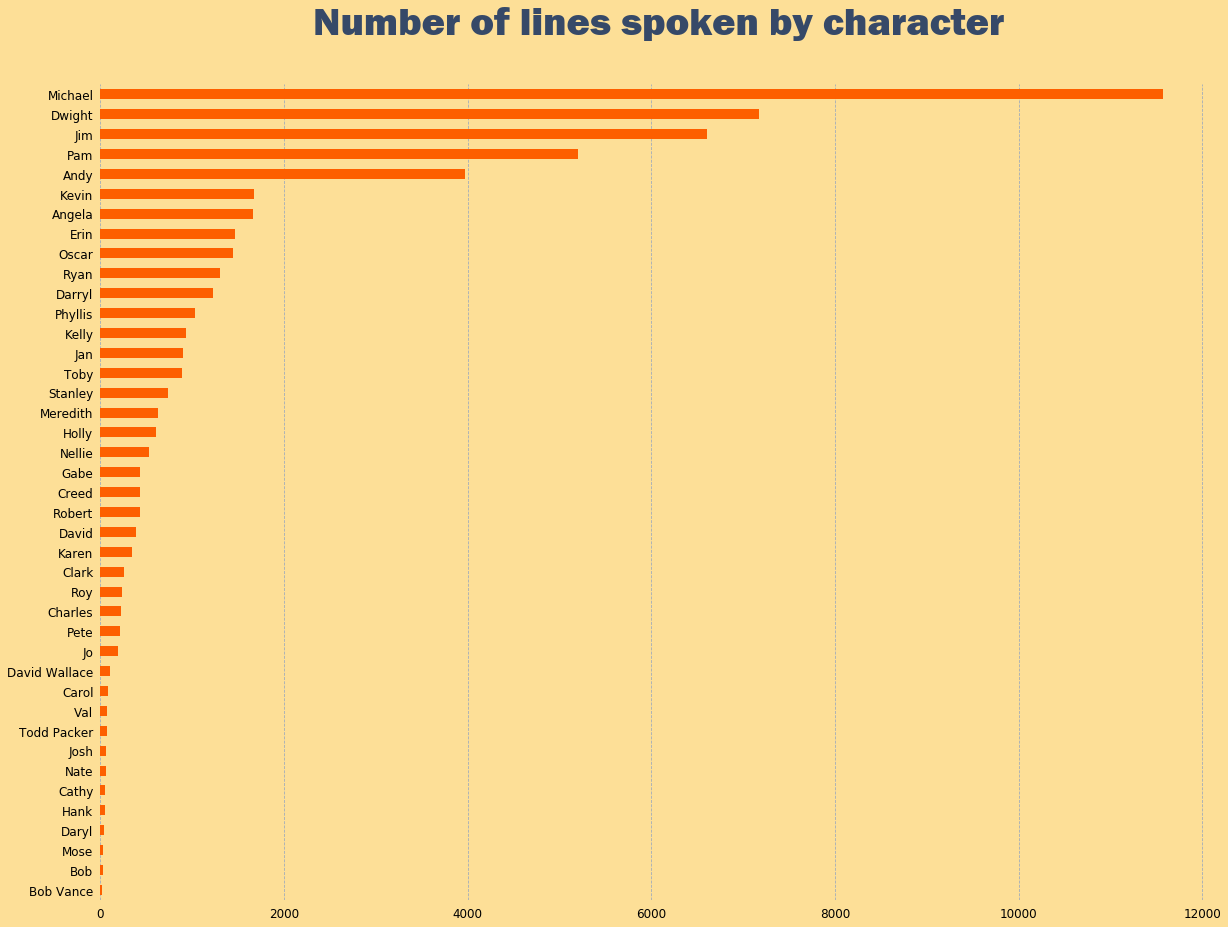

In [97]:
ax = characters_more6.speaker.value_counts().sort_values(ascending=True).plot(kind='barh', color='#fd5f00', figsize=(20,15))


ax.set_title('Number of lines spoken by character', pad=50)

ax.title.set_fontsize(40)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#92a4c0', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#f6f6e9', # colors the outside
    'axes.facecolor': '#f6f6e9', # colors the inside 
    'font.size': 12,
    'text.color': '#13334c',
    'axes.labelcolor': '#13334c',
    'legend.fancybox': True
})


#plt.savefig("lines-character-show.pdf")

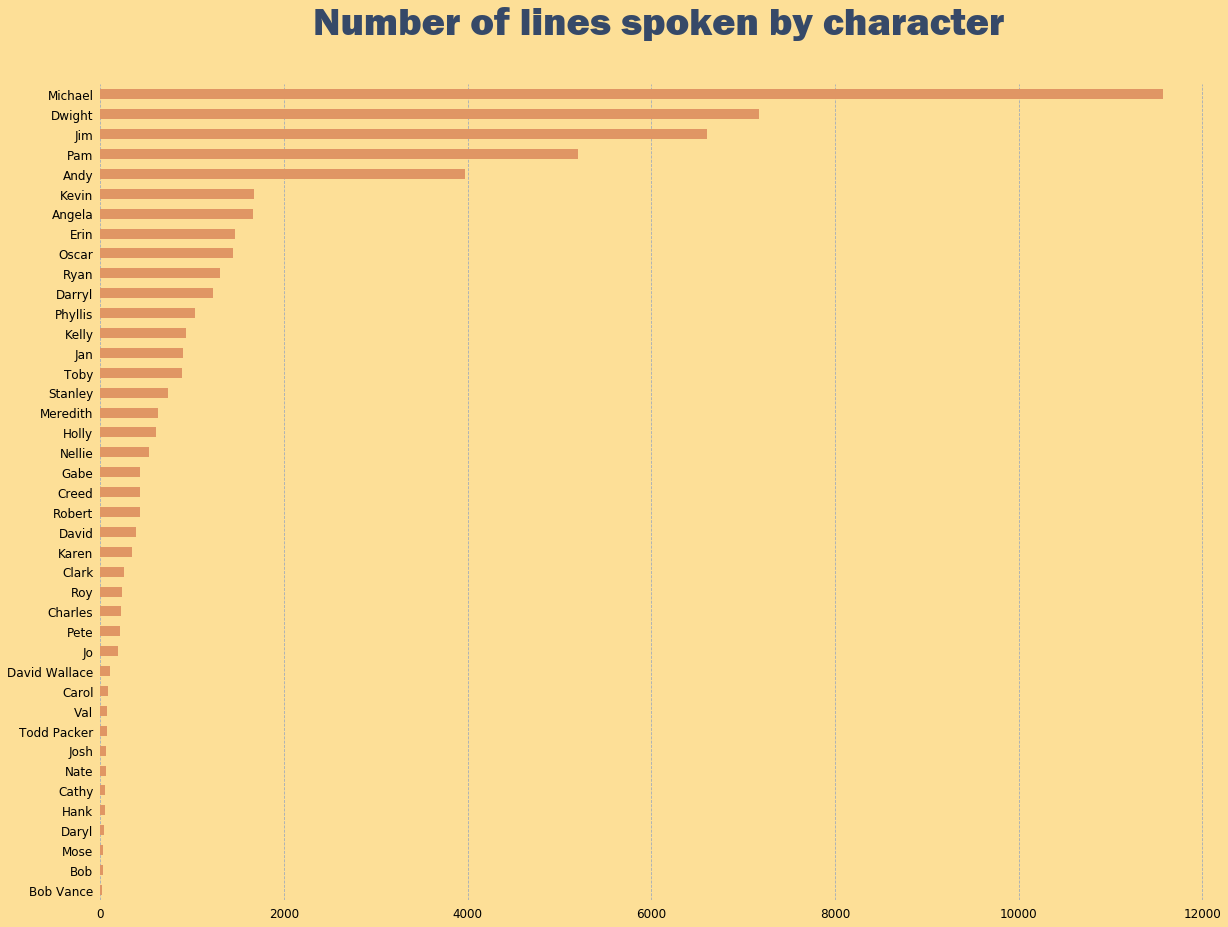

In [96]:
ax = characters_more6.speaker.value_counts().sort_values(ascending=True).plot(kind='barh', color='#e09664', figsize=(20,15))


ax.set_title('Number of lines spoken by character', pad=50)

ax.title.set_fontsize(40)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#92a4c0', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fddf97', # colors the outside
    'axes.facecolor': '#fddf97', # colors the inside 
    'font.size': 12,
    'text.color': '#364968',
    'axes.labelcolor': '#364968',
    'legend.fancybox': True
})

In [183]:
characters_more6.groupby('speaker').episode.nunique()

speaker
All                   20
Andy                  26
Angela                26
Bob                   7 
Bob Vance             7 
Both                  7 
Cathy                 7 
Charles               7 
Clark                 19
Creed                 25
Crowd                 6 
Darryl                24
David                 17
David Wallace         14
Dwight                26
Erin                  26
Everybody             7 
Everyone              17
Gabe                  23
Group                 10
Guy                   10
Hank                  12
Holly                 15
Jan                   20
Jim                   26
Jo                    8 
Josh                  7 
Karen                 22
Kelly                 25
Kevin                 26
Man                   13
Meredith              26
Michael               26
Michael and Dwight    8 
Mose                  6 
Nate                  7 
Nellie                24
Oscar                 26
Pam                   26
Pete             

In [33]:
df_scenes.speaker.value_counts().head()

Michael    11574
Dwight      7167
Jim         6609
Pam         5205
Andy        3968
Name: speaker, dtype: int64

In [34]:
characters_more6.speaker.value_counts().head()

Michael    11574
Dwight      7167
Jim         6609
Pam         5205
Andy        3968
Name: speaker, dtype: int64

**Number of lines by character in the entire show**

In [57]:
df.groupby('season').episode.value_counts()

season  episode
1       6          433
        4          360
        3          324
        5          312
        2          297
        1          270
2       22         411
        12         409
        9          408
        3          403
        8          401
        1          400
        4          385
        5          355
        10         343
        11         342
        14         341
        6          329
        18         327
        2          322
        13         312
        15         310
        7          306
        21         305
        20         297
        19         273
        17         263
        16         250
3       8          584
        10         547
                  ... 
8       11         269
        4          267
        18         264
        19         261
        17         259
        15         245
        22         239
9       23         522
        16         501
        22         501
        21         382
        8         

In [23]:
total_episodes = 6 + 22 + 25 + 19 + 28 + 26 + 26 + 24 + 25
total_episodes

201

In [55]:
df_appearances = pd.read_csv('characterappearances_cleaned.csv')
df_appearances.head()

,character,count
0,Dwight Schrute,188 episodes
1,Jim Halpert,188 episodes
2,Pam Beesly,188 episodes
3,Stanley Hudson,188 episodes
4,Kevin Malone,188 episodes


In [52]:
round(characters_more6.speaker.value_counts() / total_episodes).plot

Michael               58.0
Dwight                36.0
Jim                   33.0
Pam                   26.0
Andy                  20.0
Kevin                 8.0 
Angela                8.0 
Erin                  7.0 
Oscar                 7.0 
Ryan                  6.0 
Darryl                6.0 
Phyllis               5.0 
Kelly                 5.0 
Jan                   4.0 
Toby                  4.0 
Stanley               4.0 
Meredith              3.0 
Holly                 3.0 
Nellie                3.0 
Gabe                  2.0 
Creed                 2.0 
Robert                2.0 
David                 2.0 
Karen                 2.0 
Clark                 1.0 
Roy                   1.0 
Charles               1.0 
Pete                  1.0 
Jo                    1.0 
David Wallace         1.0 
Carol                 0.0 
Val                   0.0 
Todd Packer           0.0 
Josh                  0.0 
All                   0.0 
Everyone              0.0 
Nate                  0.0 
C

## Who spoke the most by season?

In [238]:
season_1 = characters_more6[characters_more6.season == 1]
season_2 = characters_more6[characters_more6.season == 2]
season_3 = characters_more6[characters_more6.season == 3]
season_4 = characters_more6[characters_more6.season == 4]
season_5 = characters_more6[characters_more6.season == 5]
season_6 = characters_more6[characters_more6.season == 6]
season_7 = characters_more6[characters_more6.season == 7]
season_8 = characters_more6[characters_more6.season == 8]
season_9 = characters_more6[characters_more6.season == 9]

In [239]:
season_1.speaker.value_counts().head(10)

Michael    509
Jim        231
Dwight     222
Pam        170
Oscar      42 
Jan        38 
Ryan       37 
Roy        34 
Kevin      24 
Stanley    24 
Name: speaker, dtype: int64

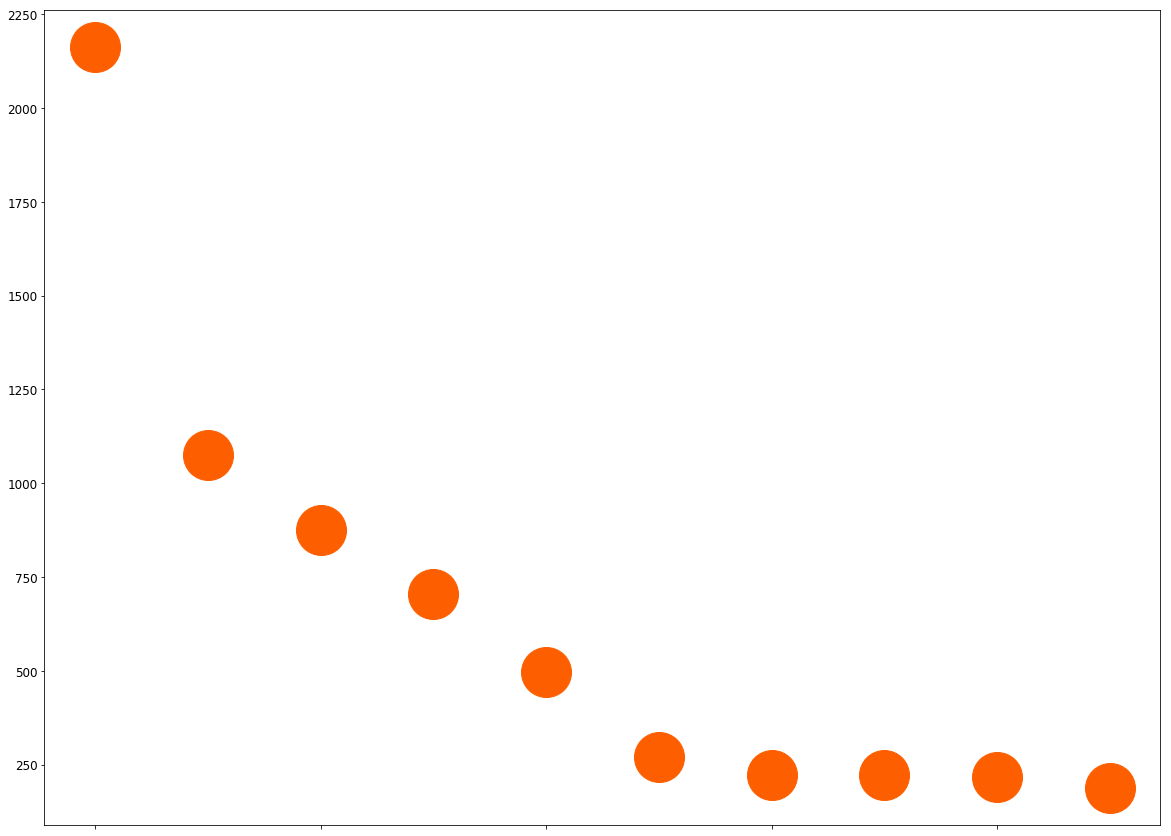

In [264]:
season_5.speaker.value_counts().head(10).plot(marker='o', linestyle=' ', markersize=50, color='#fd5f00', figsize=(20,15))


ax.set_title('Number of lines spoken by character per season', pad=50)

ax.title.set_fontsize(40)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='y', color='#92a4c0', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#13334c',
    'axes.labelcolor': '#13334c',
    'legend.fancybox': True
})

plt.savefig("season-5.pdf")

In [255]:
season_2.speaker.value_counts().head(10)

Michael    1894
Dwight     856 
Jim        764 
Pam        625 
Jan        234 
Ryan       164 
Angela     138 
Kevin      126 
Toby       111 
Oscar      100 
Name: speaker, dtype: int64

In [256]:
season_3.speaker.value_counts().head(10)

Michael    1989
Dwight     939 
Jim        773 
Pam        648 
Andy       391 
Jan        298 
Karen      292 
Angela     239 
Kevin      209 
Ryan       197 
Name: speaker, dtype: int64

In [257]:
season_4.speaker.value_counts().head(10)

Michael    1633
Jim        684 
Dwight     547 
Pam        528 
Ryan       228 
Andy       223 
Jan        214 
Angela     193 
Toby       144 
Kevin      141 
Name: speaker, dtype: int64

In [258]:
season_5.speaker.value_counts().head(10)

Michael    2163
Dwight     1074
Jim        875 
Pam        706 
Andy       497 
Holly      270 
Charles    221 
Angela     221 
Oscar      216 
Kevin      187 
Name: speaker, dtype: int64

In [259]:
season_6.speaker.value_counts().head(10)

Michael    1983
Jim        928 
Dwight     811 
Pam        706 
Andy       538 
Erin       298 
Kevin      228 
Oscar      177 
Phyllis    138 
Jo         137 
Name: speaker, dtype: int64

In [260]:
season_7.speaker.value_counts().head(10)

Michael    1401
Dwight     703 
Jim        687 
Pam        612 
Andy       557 
Erin       311 
Holly      265 
Kevin      240 
Darryl     227 
Gabe       211 
Name: speaker, dtype: int64

In [261]:
season_8.speaker.value_counts().head(10)

Andy      1125
Dwight    946 
Jim       869 
Pam       475 
Erin      427 
Robert    404 
Darryl    312 
Kevin     247 
Oscar     235 
Nellie    233 
Name: speaker, dtype: int64

In [262]:
season_9.speaker.value_counts().head(10)

Dwight    1069
Jim       798 
Pam       735 
Andy      637 
Angela    381 
Erin      380 
Oscar     294 
Nellie    287 
Darryl    278 
Kevin     266 
Name: speaker, dtype: int64

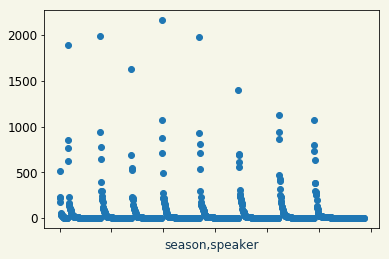

In [117]:
df_scenes.groupby('season').speaker.value_counts().plot(marker='o', linestyle=' ', x='season')

## That's what she said

In [277]:
pd.set_option('display.max_colwidth', -1)
df_scenes[df_scenes.line_text.str.contains("That's what she said|that's what she", case=False)]

,id,season,episode,scene,line_text,speaker,deleted,season_episode,sentiment
2544,2545,2,2,24,That's what she said. Pam?,Michael,False,22,0.000000
2546,2547,2,2,24,"That's what she sai [clears throat] Nope, but... Okay. Well, suit yourself.",Michael,False,22,0.500000
2590,2591,2,2,34,Does that include 'That's What She Said'?,Jim,False,22,0.000000
2593,2594,2,2,34,THAT'S WHAT SHE SAID!,Michael,False,22,0.000000
5324,5325,2,10,2,"A, that's what she said, and B, I wanted it to be impressive. The biggest day of the year deserves the biggest tree of the year.",Michael,False,210,1.000000
6321,6322,2,12,33,That's what she said.,Dwight,False,212,0.000000
7643,7644,2,17,6,That's what she said!,Michael,False,217,0.000000
8871,8872,2,21,22,"That's what she said. [Jim mouths these words along with Michael] The thing is, Angela... you are in here an awful lot. You have complained about everybody in the office, except Dwight, which is odd because everyone else has had run ins with Dwight. Toby, by the way, what does 'redacted' mean? There is a file full of complaints in here marked 'redacted'... ?",Michael,False,221,-0.221528
9623,9624,3,1,49,"I am glad that today spurred social change. That's part of my job as regional manager. But you know what? Even if it didn't, at least we put this matter to bed. ...that's what she said. Or he said.",Michael,False,31,0.077778
10903,10904,3,5,59,That's what she said. [Stanley and Michael both laugh],Stanley,False,35,0.300000


In [396]:
df_scenes[df_scenes.id == 22338]

,id,season,episode,scene,line_text,speaker,deleted,season_episode,sentiment
22337,22338,4,14,51,That's what she... a lot of places are like that.,Michael,False,414,0.0


In [370]:
df_scenes[df_scenes.line_text.str.contains("I can't believe you came") == True]

,id,season,episode,scene,line_text,speaker,deleted,season_episode,sentiment


## Who screams the most? 

In [43]:
df[df.line_text.str.contains("screams", case=False)].speaker.value_counts()

Dwight          7
Michael         4
Pam             3
Meredith        2
Andy            2
Jim             2
Roy             1
Kevin           1
Creed           1
Kelly           1
All             1
Holly           1
Sweeney Todd    1
Erin            1
Name: speaker, dtype: int64

What are they screaming about?

In [46]:
df[df.line_text.str.contains("screams", case=False)]

,id,season,episode,scene,line_text,speaker,deleted
10035,10036,3,3,20,"[on the phone] Hey Kelly, my stuff just got he...",Pam,False
14244,14245,3,16,52,[comes out of the bathroom... screams... runs ...,Meredith,False
14620,14621,3,18,1,[screams in pain] Ahh God!,Roy,False
14951,14952,3,18,55,Hey guys! Guess who's back! [Dwight pepper-sp...,Andy,False
16038,16039,3,21,44,[Screams],Kelly,False
17120,17121,4,1,21,[screams],Meredith,False
20057,20058,4,7,41,"I am totally alone right now, with only my tho...",Michael,False
24737,24738,5,6,27,[jumps into Kelly's area] Ha! [Kelly screams i...,Dwight,False
27947,27948,5,17,8,"[on phone] Hey, Tom. What's that? Oh, you foun...",Jim,False
30212,30213,5,25,1,Oh my God! I can't believe it! I jut won an ar...,Erin,False


Other ideas: search for pranks and sexism

In [49]:
pd.set_option('display.max_colwidth', -1)

df[df.line_text.str.contains("prank|pranks", case=False)].head()

,id,season,episode,scene,line_text,speaker,deleted
1127,1128,1,4,47,It's just office pranks.,Pam,False
1128,1129,1,4,47,"It's stupid. It's, it's just office pranks.",Jim,False
9032,9033,2,21,60,"Dwight, I really think someone's probably just playing a prank on you, so just go right through it.",Jim,True
9033,9034,2,21,60,"A prank, huh? This is official police line tape, okay? It's not a prank.",Dwight,True
9744,9745,3,2,14,"You know, when I saw Dwight, I realized how stupid and petty all those pranks I pulled on him were. And then he spoke. I wonder how hard it would be to get a copy of his room key.",Jim,False


In [50]:
pd.set_option('display.max_colwidth', -1)

df[df.line_text.str.contains("sexism|sexist", case=False)]

,id,season,episode,scene,line_text,speaker,deleted
15853,15854,3,21,12,I'm saying that you're being sexist.,Karen,False
15854,15855,3,21,12,No. I'm being misogynistic. That is insane. I am not being sexist.,Michael,False
44816,44817,7,22,19,"Of course you do, Jim. You're a man. Deangelo is a huge sexist.",Angela,False
44817,44818,7,22,19,"Whoa, whoa, whoa. I think if he was sexist, I'd be able to tell. I took a crapload of women's studies courses at Cornell. And I wrote my own companion piece to the 'Vagina Monologues' called the 'Penis Apologies.' So I know a thing or two.",Andy,False
44821,44822,7,22,19,"And say what? 'Hey Deangelo, are you shy or just a sexist?'",Jim,False
44836,44837,7,22,21,"Maybe there's a vibe out there, with certain members of the office, that you are...a little sexist, or --",Jim,False
44857,44858,7,22,24,"Oh, I'm glad you asked, Jim. Because apparently there's a rumor running around here that I am a sexist. I can't work here effectively if you guys think I'm something that I am not. I am not a sexist. Raise your hand if you have a vagina. [Deangelo raises hand, Kelly and Pam sheepishly raise hands] Raise your hand if someone you love has a vagina. [Deangelo raises other hand, along with rest of office] Yeah, yeah. Okay. Just about everyone. What about Deangelo's hand? Oh wow. He's got 'em both up. [Ryan raises both hands] Yeah. Uh huh. [others raise both hands] Yeah, so it bothers me when I hear that there's gossip around here that I treat women lesser than men. Okay? Frankly, we all look a little ridiculous when that happens.",Deangelo,False


In [120]:
df_michael = df_scenes[df_scenes['speaker'] == 'Michael']
df_jim = df_scenes[df_scenes['speaker'] == 'Jim']
df_angela = df_scenes[df_scenes['speaker'] == 'Angela']

## Counting the most common words said by each character

In [81]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [130]:
def tokenize(s):
    blob = TextBlob(s.lower()) # makes the string lowercase
    words = [token for token in blob.words if len(token)>2] # gives me only strings longer than 2 letters 
    return words

In [140]:
vectorizer = CountVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df_jim.line_text)

In [141]:
# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.head(20)

,'100,'actually,'administrative,'andy,'asian,'assistant,'big-picture,'bout,'boxers,'cause,...,���monster,���no���,���opportunities.���,���pilot���,���robert,���sea,���see,���side,���together,���wintergreen.���
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
def print_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:50]
    print('\n'.join([str(x) for x in sorted_list]))

In [143]:
lines = tfidf.iloc[:]
total = lines.sum(axis=0)
print_sorted_vector(total)

("n't", 742)
('just', 632)
('know', 548)
('right', 423)
('dwight', 417)
('yeah', 412)
('okay', 384)
('pam', 355)
("'re", 350)
('really', 330)
('hey', 329)
('think', 328)
('did', 288)
('michael', 270)
('like', 257)
('good', 251)
('gon', 219)
('going', 206)
('got', 198)
('let', 168)
('great', 159)
('want', 149)
("'ll", 148)
('jim', 147)
('mean', 141)
('time', 138)
('phone', 138)
('alright', 137)
('sorry', 132)
('yes', 128)
('wow', 125)
('actually', 120)
('man', 108)
('little', 108)
('doing', 108)
('work', 106)
('sure', 106)
('come', 106)
("'ve", 103)
('office', 101)
('day', 101)
('thank', 100)
('stop', 99)
('does', 98)
('wait', 95)
('look', 95)
('say', 94)
('thing', 93)
('way', 91)
('guys', 90)


## Sentiment analysis

In [157]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
sentiment_michael = df_michael[['line_text','sentiment']]

In [172]:
from textblob import TextBlob

In [183]:
df_test = df_scenes.head(50)

In [190]:
def analize_sentiment(row):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    line = TextBlob(row['line_text'])
    return line.sentiment.polarity

In [194]:
df_scenes['sentiment'] = df_scenes.apply(analize_sentiment, axis=1)

c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
df_scenes.head()

,id,season,episode,scene,line_text,speaker,deleted,season_episode,sentiment
0,1,1,1,1,All right Jim. Your quarterlies look very good. How are things at the library?,Michael,False,11,0.597857
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,11,0.000000
2,3,1,1,1,"So you've come to the master for guidance? Is this what you're saying, grasshopper?",Michael,False,11,0.000000
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,11,0.000000
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,11,0.285714


In [196]:
df_scenes.groupby('speaker').sentiment.mean()

speaker
(Pam's mom) Heleen                                                                                                                                                                                                  0.000000
3rd Athlead Employee                                                                                                                                                                                                0.000000
4th Athlead Employee                                                                                                                                                                                                0.300000
A.J.                                                                                                                                                                                                                0.110417
AJ                                                                                                          

In [216]:
df_office = df_scenes[(df_scenes.speaker == "Michael") | (df_scenes.speaker == "Erin") | (df_scenes.speaker == "Jim") | (df_scenes.speaker == "Pam") | (df_scenes.speaker == "Dwight") | (df_scenes.speaker == "Andy") | (df_scenes.speaker == "Phyllis") | (df_scenes.speaker == "Stanley") | (df_scenes.speaker == "Darryl") | (df_scenes.speaker == "Creed") | (df_scenes.speaker == "Meredith") | (df_scenes.speaker == "Oscar") | (df_scenes.speaker == "Angela") | (df_scenes.speaker == "Kevin") | (df_scenes.speaker == "Ryan") | (df_scenes.speaker == "Toby") | (df_scenes.speaker == "Kelly")]
df_office.speaker.value_counts()

Michael     11574
Dwight      7167 
Jim         6609 
Pam         5205 
Andy        3968 
Kevin       1668 
Angela      1658 
Erin        1469 
Oscar       1444 
Ryan        1301 
Darryl      1228 
Phyllis     1031 
Kelly       935  
Toby        889  
Stanley     732  
Meredith    631  
Creed       431  
Name: speaker, dtype: int64

In [230]:
characters_sentiment = round((df_office.groupby('speaker').sentiment.mean() * 10), 3).reset_index()
characters_sentiment

,speaker,sentiment
0,Andy,0.724
1,Angela,0.368
2,Creed,0.796
3,Darryl,0.635
4,Dwight,0.734
5,Erin,0.641
6,Jim,0.975
7,Kelly,0.471
8,Kevin,0.575
9,Meredith,0.390


In [236]:
def get_color(sentiment):
    
    sentiment = float(sentiment)
    if sentiment <= 0.3:
        return '#E45F14'
    elif 0.3 < sentiment <= 0.4:
        return '#BD5F39'
    elif 0.4 < sentiment <= 0.5:
        return '#A15F53'
    elif 0.5 < sentiment <= 0.6:
        return '#866168'
    elif 0.6 < sentiment <= 0.7:
        return '#73617B' 
    elif 0.7 < sentiment <= 0.8:
        return '#5C608F'
    elif 0.8 < sentiment <= 0.9:
        return '#4C609D'
    elif sentiment > 0.9:
        return '#3C60AC'
    
characters_sentiment['colors'] = characters_sentiment['sentiment'].apply(lambda x: get_color(x))

In [237]:
characters_sentiment

,speaker,sentiment,colors
0,Andy,0.724,#5C608F
1,Angela,0.368,#BD5F39
2,Creed,0.796,#5C608F
3,Darryl,0.635,#73617B
4,Dwight,0.734,#5C608F
5,Erin,0.641,#73617B
6,Jim,0.975,#3C60AC
7,Kelly,0.471,#A15F53
8,Kevin,0.575,#866168
9,Meredith,0.390,#BD5F39


In [406]:
df_michael = df_scenes[df_scenes.speaker == 'Michael']
df_jim = df_scenes[df_scenes.speaker == 'Jim']


In [410]:
df_jim.sort_values(by='sentiment', ascending=False).line_text

27524    What?! You have a cake. You have a delicious cake, with your name spelled correctly?                                                                                                                                   
35911    That's awesome.                                                                                                                                                                                                        
55706    That���s so great!                                                                                                                                                                                                     
32898    Well, we went on a Segway tour and we're awesome at it and Frank and Beans!                                                                                                                                            
32752    And whoever comes up with the best idea gets a $50 gift certificate to the restaurant of hi

## Laughs / Cries

In [417]:
df_laughs = df_scenes[df_scenes.line_text.str.contains('laughs|laugh|laughing') == True]

df_laughs.speaker.value_counts()

Michael               193
Dwight                100
Jim                   82 
Pam                   74 
Andy                  71 
Erin                  29 
Robert                24 
Angela                21 
Oscar                 17 
Phyllis               17 
Kevin                 17 
Darryl                17 
Gabe                  15 
Stanley               15 
Holly                 15 
Toby                  15 
Deangelo              11 
Jan                   11 
Roy                   8  
Nellie                7  
Kelly                 7  
Jessica               6  
Karen                 4  
Mark                  4  
David                 3  
Meredith              3  
Creed                 3  
Danny                 3  
Helene                3  
A.J.                  3  
                     ..  
Group                 1  
Senator               1  
Robert Dunder         1  
Tom                   1  
Man                   1  
Pam & Dwight          1  
Bert                  1  
Pete        

In [419]:
df_cry = df_scenes[df_scenes.line_text.str.contains('cries|cry|crying|sobs|sob|sobbing') == True]

df_cry.speaker.value_counts()

Michael               36
Dwight                20
Jim                   17
Pam                   15
Andy                  15
Angela                13
Kevin                 8 
Kelly                 7 
Darryl                3 
Erin                  3 
Phyllis               3 
Toby                  3 
Bill Hader            3 
Cece                  3 
Jan                   3 
Gabe                  2 
Nellie                2 
Oscar                 2 
Guy                   2 
Casey Dean            1 
Ryan                  1 
Holly                 1 
Sweeney Todd          1 
Clark                 1 
Brian                 1 
Director              1 
Hannah                1 
Michael and Dwight    1 
Pete                  1 
Lily                  1 
Santigold             1 
Meredith              1 
Sam                   1 
Song                  1 
Robert                1 
Phillip               1 
Carla Fern            1 
Name: speaker, dtype: int64